In [99]:
from ipstartup import *
import pandas as pd
from pipe import *
from utils import spaced
from transformers import pipeline
os.chdir("/mnt/d/data1/reports")

[cellevents:43:INFO]:starting (time=Jun-22 19:19 MainProcess)


time: 1.88 ms


In [100]:
classifier = pipeline(model='nbroad/ESG-BERT')

[cellevents:43:INFO]:starting (time=Jun-22 19:19 MainProcess)


Downloading:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

time: 11.4 s


In [101]:
f = "0a4b2b4d-8131-446f-acda-e4c2ec109663.pdf"
base = os.path.splitext(f)[0]
df = pd.read_pickle(f"kwtopics/{base}")

[cellevents:43:INFO]:starting (time=Jun-22 19:20 MainProcess)


time: 90.3 ms


In [107]:
df.topic1.value_counts()

[cellevents:43:INFO]:starting (time=Jun-22 19:21 MainProcess)


Sustainable Economic Performance               53
Energy                                         43
Employee Engagement & Diversity & Inclusion    39
Materials                                       8
Water                                           4
Occupational health and safety                  3
Business ethics                                 2
Waste                                           2
Mobility                                        1
Board                                           1
Name: topic1, dtype: int64

time: 15.2 ms


In [108]:
results = []
for sent in tqdm(df.sent):
    result = classifier(sent)
    results.append(result)
df["esg"] = [res[0]['label'] for res in results]
df["score"] = [res[0]['score'] for res in results]

[cellevents:43:INFO]:starting (time=Jun-22 19:21 MainProcess)


  0%|          | 0/1113 [00:00<?, ?it/s]

time: 2min 32s


In [112]:
df1 = df[df.topic1.notnull()]
pd.crosstab(df.esg, df1.topic1)

[cellevents:43:INFO]:starting (time=Jun-22 19:25 MainProcess)


topic1,Board,Business ethics,Employee Engagement & Diversity & Inclusion,Energy,Materials,Mobility,Occupational health and safety,Sustainable Economic Performance,Waste,Water
esg,,,,,,,,,,
Air_Quality,0,0,0,0,0,0,0,0,1,0
Business_Ethics,0,2,3,0,0,0,1,5,0,0
Business_Model_Resilience,0,0,2,3,2,0,0,0,0,0
Director_Removal,1,0,9,0,0,0,0,0,0,0
Employee_Engagement_Inclusion_And_Diversity,0,0,9,0,0,0,0,0,0,0
Employee_Health_And_Safety,0,0,0,0,0,0,1,0,0,0
Energy_Management,0,0,0,13,0,0,0,0,0,0
GHG_Emissions,0,0,0,8,0,0,0,0,0,0
Labor_Practices,0,0,6,0,0,0,0,0,0,0


time: 137 ms


[cellevents:43:INFO]:starting (time=Jun-22 19:26 MainProcess)


<AxesSubplot:>

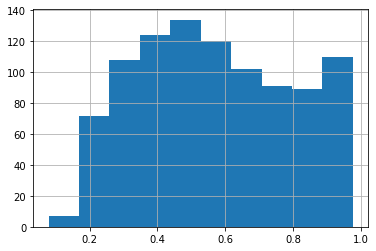

time: 450 ms


In [114]:
df.loc[df.ntopics==0].score.hist()

# archive

In [53]:
# export data for checking
np.random.seed(0)
df.loc[(df.nsubtopics==0) & (df.score<.5), cols].sample(frac=1).to_excel("/mnt/d/data1/lowscore_na.xlsx")
df.loc[(df.nsubtopics==0) & (df.score>=.5), cols].sample(frac=1).to_excel("/mnt/d/data1/highscore_na.xlsx")
df.loc[(df.nsubtopics==1) & (df.esgtopic!=df.Sub_Topics) & (df.Sub_Topics!="na"), cols].sample(frac=1).to_excel("/mnt/d/data1/unmatched.xlsx")
pd.crosstab(df.Sub_Topics, df.esg).to_excel("/mnt/d/data1/crosstabsesg.xlsx")
pd.crosstab(df.Sub_Topics, df.esgtopic).to_excel("/mnt/d/data1/crosstabs.xlsx")

[cellevents:43:INFO]:starting (time=Jun-21 13:04 MainProcess)


time: 1.12 s


In [ ]:
"""
issues with data
* often unclear what subtopic to assign to a sentence
* lack of an obvious right answer makes it hard to compare keywords with the ESG-bert model
* especially hard to define or give examples of "none of the above"

Despite these issues I suggest the ESG-bert model is a significant improvement on keywords

Upsides of ESG-bert versus keywords
* Uses almost the same subtopics
* Performs better on main subtopic e.g. words such as "material" which has a different meaning in financial reports.
* Easier to adapt and improve by retraining on new examples.
* Easier to measure performance after changes

Downsides of ESG-bert
* No equivalent of "mobility". This could be merged with "energy"; or retrain with examples of mobility.
* No "none of the above" subtopic. Can use no keyword matches and score<.5; or retrain with examples of "none of the above".
* Single topic only. However keyword matching is poor at this. Could be retrained for multi-topic.

For the mapping of topics see keywords.xlsx
For a crosstab of the two approaches for one document see crosstab_edited

"""